In [1]:
# Mount Google Drive if you're using files from there
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def load_data(file_path):
    df = pd.read_csv(file_path, header=[0, 1], index_col=0, parse_dates=True)
    return df



financial_data = load_data('/content/drive/My Drive/Kifiya/week 11/financial_data.csv')

# financial_data = pd.read_csv("/content/drive/My Drive/Kifiya/week 11/financial_data.csv, header=[0, 1], index_col=0, parse_dates=True")


In [ ]:
financial_data.head(6)

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358788  173.173798  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542763  170.046310  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726753  168.444656  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765049  170.543655  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665382  173.569962  14.041333  83.050003   
2015-01-09 00:00:00+00:00  63.772705  172.179031  13.777333  83.190002   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.820007  14.085333  83.379997  202.720001   
2015-01-07 00:00:00+00:00  202.309998  14.063333  83.279999  202.720001   
2015-01-08 00:00:00+00:00  205.899994  14.041333  83.110001  206.160004   
2015-01-09 00:00:00+00:00  204.250000  13.777333  83.290001  206.419998   

Price                                       Low                         \
Ticker                          TSLA        BND         SPY       TSLA   
Date                                                                     
2015-01-02 00:00:00+00:00  14.883333  82.419998  204.179993  14.217333   
2015-01-05 00:00:00+00:00  14.433333  82.699997  201.350006  13.810667   
2015-01-06 00:00:00+00:00  14.280000  83.029999  198.860001  13.614000   
2015-01-07 00:00:00+00:00  14.318667  83.050003  200.880005  13.985333   
2015-01-08 00:00:00+00:00  14.253333  82.970001  203.990005  14.000667   
2015-01-09 00:00:00+00:00  13.998667  83.000000  203.509995  13.664000   

Price                           Open                          Volume  \
Ticker                           BND         SPY       TSLA      BND   
Date                                                                   
2015-01-02 00:00:00+00:00  82.430000  206.380005  14.858000  2218800   
2015-01-05 00:00:00+00:00  82.739998  204.169998  14.303333  5820100   
2015-01-06 00:00:00+00:00  83.029999  202.089996  14.004000  3887600   
2015-01-07 00:00:00+00:00  83.139999  201.419998  14.223333  2433400   
2015-01-08 00:00:00+00:00  83.110001  204.009995  14.187333  1873400   
2015-01-09 00:00:00+00:00  83.010002  206.399994  13.928000  1646100   

Price                                           
Ticker                           SPY      TSLA  
Date                                            
2015-01-02 00:00:00+00:00  121465900  71466000  
2015-01-05 00:00:00+00:00  169632600  80527500  
2015-01-06 00:00:00+00:00  209151400  93928500  
2015-01-07 00:00:00+00:00  125346700  44526000  
2015-01-08 00:00:00+00:00  147217800  51637500  
2015-01-09 00:00:00+00:00  158567300  70024500

In [4]:
!pip install statsmodels
!pip install pmdarima
!pip install tensorflow
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00


In [5]:
print(financial_data.dtypes)

Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND         int64
           SPY         int64
           TSLA        int64
dtype: object


In [6]:
# Convert all columns to numeric, forcing errors to NaN
financial_data = financial_data.apply(pd.to_numeric, errors='coerce')

# Check for NaN values again
print(financial_data.isna().sum())  # Verify remaining NaNs

# Option 1: Drop rows with NaN values
financial_data = financial_data.dropna()

# # Option 2: Fill NaNs using forward-fill
# financial_data = financial_data.ffill()

# Option 3: Interpolate missing values
financial_data = financial_data.interpolate(method='linear', limit_direction='forward', axis=0)

# Verify data types and preview
print(financial_data.dtypes)
print(financial_data.head())

# Split the data into train and test sets
train_size = int(len(financial_data) * 0.8)
train_data = financial_data[:train_size]
test_data = financial_data[train_size:]

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))



Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64
Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND         int64
           SPY         int64
           TSLA        int64
dtype: object
P

In [7]:
 print(financial_data.columns)



MultiIndex([('Adj Close',  'BND'),
            ('Adj Close',  'SPY'),
            ('Adj Close', 'TSLA'),
            (    'Close',  'BND'),
            (    'Close',  'SPY'),
            (    'Close', 'TSLA'),
            (     'High',  'BND'),
            (     'High',  'SPY'),
            (     'High', 'TSLA'),
            (      'Low',  'BND'),
            (      'Low',  'SPY'),
            (      'Low', 'TSLA'),
            (     'Open',  'BND'),
            (     'Open',  'SPY'),
            (     'Open', 'TSLA'),
            (   'Volume',  'BND'),
            (   'Volume',  'SPY'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [8]:
# Extract 'Adj Close' for TSLA
tesla_data = financial_data[('Adj Close', 'TSLA')]



In [9]:
financial_data= financial_data.dropna()

In [ ]:
financial_data.head(5)

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358788  173.173798  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542763  170.046310  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726753  168.444656  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765049  170.543655  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665382  173.569962  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.820007  14.085333  83.379997  202.720001   
2015-01-07 00:00:00+00:00  202.309998  14.063333  83.279999  202.720001   
2015-01-08 00:00:00+00:00  205.899994  14.041333  83.110001  206.160004   

Price                                       Low                         \
Ticker                          TSLA        BND         SPY       TSLA   
Date                                                                     
2015-01-02 00:00:00+00:00  14.883333  82.419998  204.179993  14.217333   
2015-01-05 00:00:00+00:00  14.433333  82.699997  201.350006  13.810667   
2015-01-06 00:00:00+00:00  14.280000  83.029999  198.860001  13.614000   
2015-01-07 00:00:00+00:00  14.318667  83.050003  200.880005  13.985333   
2015-01-08 00:00:00+00:00  14.253333  82.970001  203.990005  14.000667   

Price                           Open                          Volume  \
Ticker                           BND         SPY       TSLA      BND   
Date                                                                   
2015-01-02 00:00:00+00:00  82.430000  206.380005  14.858000  2218800   
2015-01-05 00:00:00+00:00  82.739998  204.169998  14.303333  5820100   
2015-01-06 00:00:00+00:00  83.029999  202.089996  14.004000  3887600   
2015-01-07 00:00:00+00:00  83.139999  201.419998  14.223333  2433400   
2015-01-08 00:00:00+00:00  83.110001  204.009995  14.187333  1873400   

Price                                           
Ticker                           SPY      TSLA  
Date                                            
2015-01-02 00:00:00+00:00  121465900  71466000  
2015-01-05 00:00:00+00:00  169632600  80527500  
2015-01-06 00:00:00+00:00  209151400  93928500  
2015-01-07 00:00:00+00:00  125346700  44526000  
2015-01-08 00:00:00+00:00  147217800  51637500

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller

# Assuming 'financial_data' is your dataframe with multi-level columns
# Extract the 'Adj Close' prices for TSLA
tesla_data = financial_data[('Adj Close', 'TSLA')]

# 1. Check for Stationarity (Augmented Dickey-Fuller Test)
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("Data is non-stationary. Differencing required.")
    else:
        print("Data is stationary.")

check_stationarity(tesla_data)

# 2. Differencing if the data is non-stationary
tesla_diff = tesla_data.diff().dropna()  # Difference to make the series stationary



ADF Statistic: -1.1507672706146086
p-value: 0.6944080657685285
Data is non-stationary. Differencing required.


ADF Statistic: -1.1507672706146086
p-value: 0.6944080657685285
The time series is not stationary. Differencing the data.
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12343.521, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12339.337, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12338.340, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12338.444, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=12339.755, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=12339.529, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=12341.752, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12339.852, Time=0.16 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.989 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1978
Model:               SARIMAX(1, 0, 0)   Log Likelihood           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


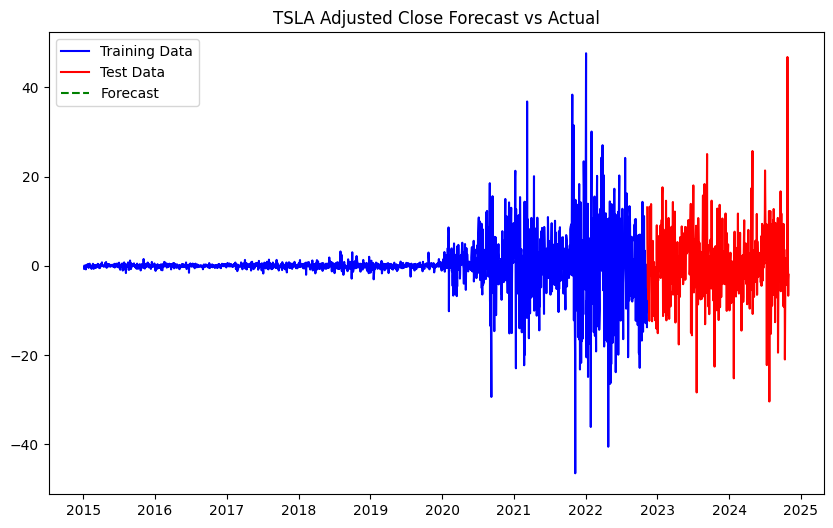

Mean Absolute Error (MAE): 5.43375287452871
Root Mean Squared Error (RMSE): 7.500320292904899
Mean Absolute Percentage Error (MAPE): nan%


<ipython-input-11-d6b26b4aa3dc>:65: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test - forecast) / test)) * 100


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from math import sqrt

# Function to load data
def load_data(file_path):
    df = pd.read_csv(file_path, header=[0, 1], index_col=0, parse_dates=True)
    return df

# # Load your financial data
# financial_data = load_data('/content/drive/My Drive/Kifiya/week 11/financial_data.csv')

# Extract 'Adj Close' for TSLA
tesla_data = financial_data[('Adj Close', 'TSLA')]

# Step 1: Check for Stationarity (ADF Test)
def check_stationarity(data):
    result = adfuller(data.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")

    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary. Differencing the data.")
        data = data.diff().dropna()  # Apply differencing if non-stationary
        return data
    return data

# Check stationarity and difference if necessary
tesla_data = check_stationarity(tesla_data)

# Step 2: Train-Test Split
train_size = int(len(tesla_data) * 0.8)
train, test = tesla_data[:train_size], tesla_data[train_size:]

# Step 3: Fit the ARIMA Model (using auto_arima)
model = auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Print the model summary
print(model.summary())

# Step 4: Forecast the future values
forecast = model.predict(n_periods=len(test))

# Convert forecast to pandas Series with the correct index
forecast_series = pd.Series(forecast, index=test.index)

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Test Data', color='red')
plt.plot(forecast_series, label='Forecast', color='green', linestyle='--')
plt.title('TSLA Adjusted Close Forecast vs Actual')
plt.legend()
plt.show()

# Step 6: Evaluate the Model’s Performance (MAE, RMSE, MAPE)
mae = mean_absolute_error(test, forecast)
rmse = sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


In [ ]:
# Ensure your data has a proper datetime index
tesla_data.index = pd.to_datetime(tesla_data.index)

# Verify if the index is properly set
print(tesla_data.index)

# Drop NaN values or interpolate them (choose based on your preference)
train = train.dropna()  # or use train.interpolate()
test = test.dropna()  # or use test.interpolate()

# Check if there are any remaining NaNs in the data
print(f"Train Data NaNs: {train.isna().sum()}")
print(f"Test Data NaNs: {test.isna().sum()}")

DatetimeIndex(['2015-01-05 00:00:00+00:00', '2015-01-06 00:00:00+00:00',
               '2015-01-07 00:00:00+00:00', '2015-01-08 00:00:00+00:00',
               '2015-01-09 00:00:00+00:00', '2015-01-12 00:00:00+00:00',
               '2015-01-13 00:00:00+00:00', '2015-01-14 00:00:00+00:00',
               '2015-01-15 00:00:00+00:00', '2015-01-16 00:00:00+00:00',
               ...
               '2024-10-17 00:00:00+00:00', '2024-10-18 00:00:00+00:00',
               '2024-10-21 00:00:00+00:00', '2024-10-22 00:00:00+00:00',
               '2024-10-23 00:00:00+00:00', '2024-10-24 00:00:00+00:00',
               '2024-10-25 00:00:00+00:00', '2024-10-28 00:00:00+00:00',
               '2024-10-29 00:00:00+00:00', '2024-10-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2473, freq=None)
Train Data NaNs: 0
Test Data NaNs: 0


In [ ]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# Use auto_arima to find the best ARIMA model
auto_arima_model = auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Print the summary of the best ARIMA model
print(auto_arima_model.summary())

# Forecast using the optimized model
optimized_forecast = auto_arima_model.predict(n_periods=len(test))

# Check the forecasted values
print("Optimized Forecasted values:")
print(optimized_forecast)

# Convert forecasted values into a pandas series with correct index for comparison
# Here, we use the 'test.index' to align the forecast with the correct dates
optimized_forecast_series = pd.Series(optimized_forecast, index=test.index)

# Print the forecasted pandas series
print("Optimized Forecast Series:")
print(optimized_forecast_series)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12343.521, Time=1.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12339.337, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12338.340, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12338.444, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=12339.755, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=12339.529, Time=1.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=12341.752, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12339.852, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.048 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1978
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -6167.170
Date:                Fri, 08 Nov 2024   AIC                          12338.340
Time:                       

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ADF Statistic: -1.1507672706146086
p-value: 0.6944080657685285
Critical Values: {'1%': -3.433026277967909, '5%': -2.862722353917318, '10%': -2.56739941472018}
ADF Statistic: -10.088201009165362
p-value: 1.1404778247008311e-17
Critical Values: {'1%': -3.4330273737125445, '5%': -2.8627228377894505, '10%': -2.567399672341618}
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12343.521, Time=1.86 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12339.337, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12338.340, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12338.444, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=12339.755, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=12339.529, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=12341.752, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12339.852, Time=0.19 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.195 seconds
                   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

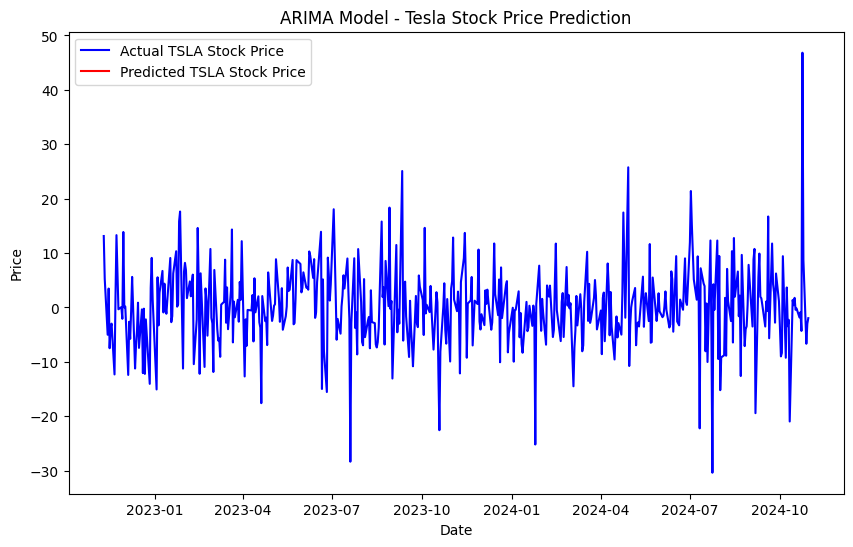

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima

# Assuming 'financial_data' is already loaded and has a MultiIndex

# Step 1: Select the 'TSLA' data from the 'Adj Close' column
tsla_data = financial_data[('Adj Close', 'TSLA')]

# Step 2: Check for stationarity using ADF test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

adf_test(tsla_data)  # Check stationarity for the original series

# Step 3: If data is non-stationary, apply differencing
# Differencing to make the series stationary
tsla_diff = tsla_data.diff().dropna()
adf_test(tsla_diff)  # Check if differenced data is stationary

# Step 4: Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(tsla_diff) * 0.8)  # Use the differenced data for model fitting
train, test = tsla_diff[:train_size], tsla_diff[train_size:]

# Step 5: Auto ARIMA to find optimal parameters (p, d, q)
model_auto = auto_arima(train, seasonal=False, stepwise=True, trace=True)
print(model_auto.summary())

# Step 6: Fit ARIMA Model with optimal parameters found from Auto ARIMA
order = model_auto.order  # This gives the (p, d, q) values
model = ARIMA(tsla_data, order=order)
model_fit = model.fit()

# Step 7: Make predictions on the test set
forecast = model_fit.forecast(steps=len(test))

# Step 8: Check for NaN values in forecast and test data
if forecast is None or np.any(np.isnan(forecast)):
    print("NaN detected in forecast!")
else:
    print("Forecast is valid.")

if test.isnull().any():
    print("NaN detected in test data!")
else:
    print("Test data is valid.")

# Step 9: Ensure alignment and handle NaN values in test data and forecasted data
forecast_series = pd.Series(forecast, index=test.index)

# Remove NaN values from both test and forecast if they exist
forecast_series = forecast_series.dropna()
test_clean = test.dropna()

# Step 10: Check if the forecast and test data are of the same length
if len(forecast_series) != len(test_clean):
    print(f"Mismatch in lengths! Forecast length: {len(forecast_series)}, Test length: {len(test_clean)}")
else:
    # Step 11: Evaluate model performance (RMSE and MAE)
    rmse = sqrt(mean_squared_error(test_clean, forecast_series))
    mae = np.mean(np.abs(test_clean - forecast_series))
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")

# Step 12: Plot the actual vs predicted values for comparison
plt.figure(figsize=(10, 6))
plt.plot(test_clean.index, test_clean, color='blue', label='Actual TSLA Stock Price')
plt.plot(forecast_series.index, forecast_series, color='red', label='Predicted TSLA Stock Price')
plt.title('ARIMA Model - Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=-11358.961, Time=7.31 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=-11365.220, Time=0.43 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=-11364.945, Time=2.29 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=-11364.893, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=-11366.772, Time=0.17 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=-11363.970, Time=0.49 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=-11364.065, Time=0.76 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=-11363.254, Time=1.58 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=-11366.257, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=-11366.151, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=-11365.003, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 15.751 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observat

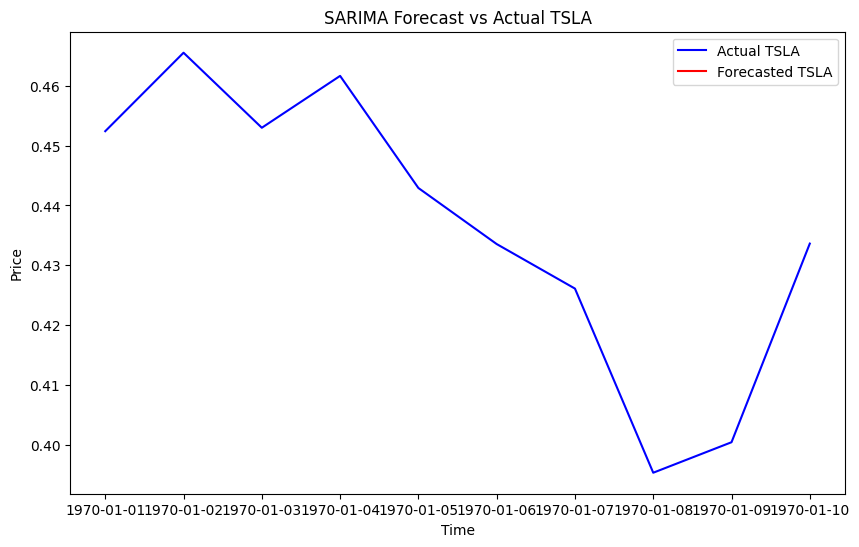

In [ ]:
# Use auto_arima to find the best parameters for SARIMA (p, d, q) and (P, D, Q, S)
model_sarima = pm.auto_arima(train, seasonal=True, m=5, trace=True, error_action='ignore', suppress_warnings=True)

# Print the SARIMA model summary
print(model_sarima.summary())

# Forecast the next 'n' steps (e.g., 10 days)
forecast_sarima = model_sarima.predict(n_periods=forecast_steps)

# Compare predictions with the test set
actual_sarima = test[:forecast_steps].values

# Calculate MAE, RMSE, MAPE
mae_sarima = mean_absolute_error(actual_sarima, forecast_sarima)
rmse_sarima = sqrt(mean_squared_error(actual_sarima, forecast_sarima))
mape_sarima = mean_absolute_percentage_error(actual_sarima, forecast_sarima)

print(f"SARIMA MAE: {mae_sarima}")
print(f"SARIMA RMSE: {rmse_sarima}")
print(f"SARIMA MAPE: {mape_sarima}%")

# Plot the forecasted vs actual values for SARIMA
plt.figure(figsize=(10, 6))
plt.plot(actual_sarima, color='blue', label='Actual TSLA')
plt.plot(forecast_sarima, color='red', label='Forecasted TSLA')
plt.title('SARIMA Forecast vs Actual TSLA')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0363 - val_loss: 0.0018
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 8.9625e-04 - val_loss: 0.0017
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.8271e-04 - val_loss: 0.0016
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.5896e-04 - val_loss: 0.0013
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.0995e-04 - val_loss: 0.0012
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.0171e-04 - val_loss: 0.0011
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.0620e-04 - val_loss: 0.0011
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.8117e-04 - val_loss: 0.0010
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.6932e-04 - val_loss: 9.4403e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.3140e-04 - val_loss: 9.6448e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5901e-04 - val_loss: 0.0014
Epoch 12/20
61/61 ━━━━━━━━

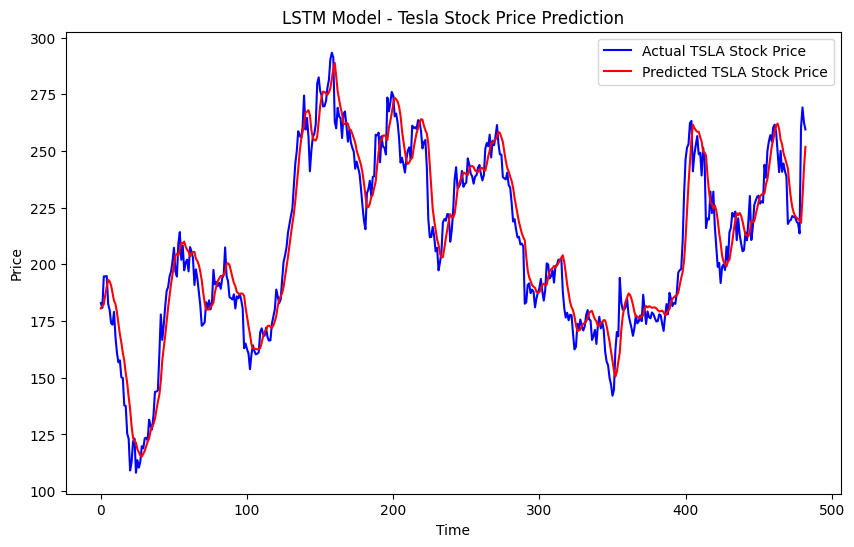

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming 'financial_data' is a DataFrame with 'TSLA' column containing Tesla's stock prices

# 1. Normalize the 'TSLA' data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
tsla_scaled = scaler.fit_transform(financial_data[('Adj Close', 'TSLA')].values.reshape(-1, 1))

# 2. Create sequences of a fixed length (e.g., 60 days)
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Use the last 'time_step' data points
        y.append(data[i + time_step, 0])      # The target value is the next day (y)
    return np.array(X), np.array(y)

# Create sequences (use 60 previous days to predict the next day)
X, y = create_sequences(tsla_scaled, time_step=60)

# Reshape X to be [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# 3. Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 4. Build the LSTM Model
model = Sequential()

# Add LSTM layer with 50 units (hyperparameter tuning might be required here)
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add a Dense layer for output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the LSTM model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 6. Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Evaluate model performance

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# MAE
mae = mean_absolute_error(y_test_actual, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# MAPE
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


# 8. Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual TSLA Stock Price')
plt.plot(predictions, color='red', label='Predicted TSLA Stock Price')
plt.title('LSTM Model - Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Future Predictions Using the Trained Model
Since you're using an LSTM model, you'll be predicting the future stock prices step by step (predicting one day at a time and using the predicted value as input for the next prediction). You can forecast for a desired period, such as 6 to 12 months, by predicting one day at a time iteratively.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

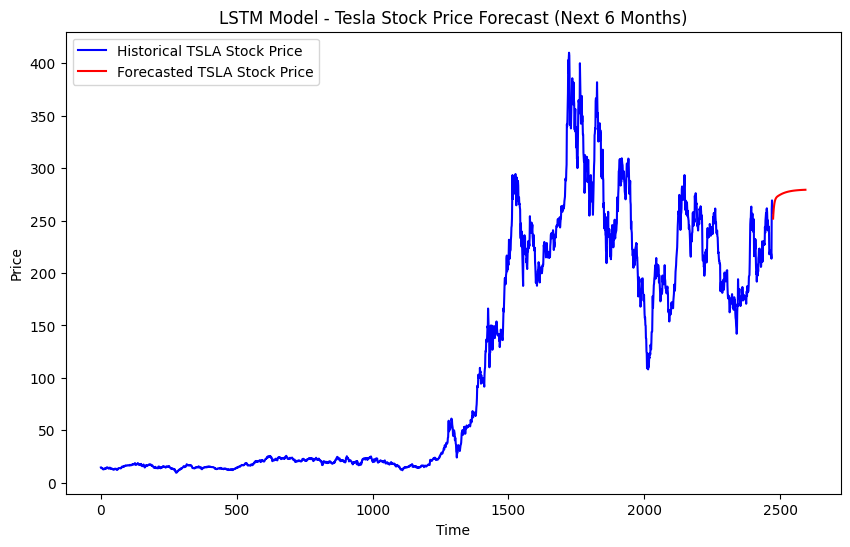

In [13]:
# Function to predict the next n days (6-12 months)
def predict_future_prices(model, last_sequence, n_days, scaler):
    predicted_prices = []
    current_sequence = last_sequence.copy()

    for _ in range(n_days):
        prediction = model.predict(current_sequence.reshape(1, -1, 1))  # Predict next day
        predicted_prices.append(prediction[0][0])  # Append predicted price

        # Update the sequence to include the new prediction
        current_sequence = np.append(current_sequence[1:], prediction, axis=0)

    # Inverse transform to get the prices back to original scale
    predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

    return predicted_prices

# Get the last sequence from the test data (the most recent available data)
last_sequence = X_test[-1]

# Number of days to forecast (e.g., for 6 months of trading days, approx. 120 days)
forecast_days = 120

# Get the predicted future stock prices
future_predictions = predict_future_prices(model, last_sequence, forecast_days, scaler)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(range(len(tsla_scaled)), scaler.inverse_transform(tsla_scaled), color='blue', label='Historical TSLA Stock Price')
plt.plot(range(len(tsla_scaled), len(tsla_scaled) + len(future_predictions)), future_predictions, color='red', label='Forecasted TSLA Stock Price')
plt.title('LSTM Model - Tesla Stock Price Forecast (Next 6 Months)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


 Forecast Analysis
Confidence Intervals:
You can estimate confidence intervals by taking the model’s prediction and adding uncertainty. One way to achieve this is by using Monte Carlo simulations or bootstrapping to generate a distribution of possible future prices and estimating the range (upper and lower bounds). However, LSTM models typically do not provide direct confidence intervals. A more straightforward approach might be to generate multiple predictions (e.g., by adding small variations in the input or initial conditions) and analyze the spread of the results.

Trend Analysis:
Look for long-term trends: Identify if the model predicts consistent upward or downward trends. For example, if the forecast consistently rises, it could signal that the model expects the stock price to go up due to market sentiment or positive financial performance. A downward trend may indicate a potential decline.

Patterns or anomalies: Check for cyclic patterns (e.g., seasonal behavior), sudden spikes, or dips in the forecast. You could analyze these anomalies to understand why they occur, such as external market events (e.g., earnings reports, geopolitical factors).

Volatility and Risk:
Volatility: By evaluating the range of your forecast (for example, using the difference between the 90th and 10th percentiles of a set of predictions), you can get an idea of expected market volatility. Wider confidence intervals indicate higher uncertainty and risk. Narrow confidence intervals suggest greater predictability and stability.

Periods of High Volatility: Identify time periods where the forecast uncertainty (confidence intervals) is larger. This could signal potential market events (earnings reports, product launches, or economic changes) that may cause fluctuations.

Example of Confidence Interval Estimation:
You could perform Monte Carlo simulations to generate multiple forecasts and estimate a confidence interval for the predicted future prices. For examp

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

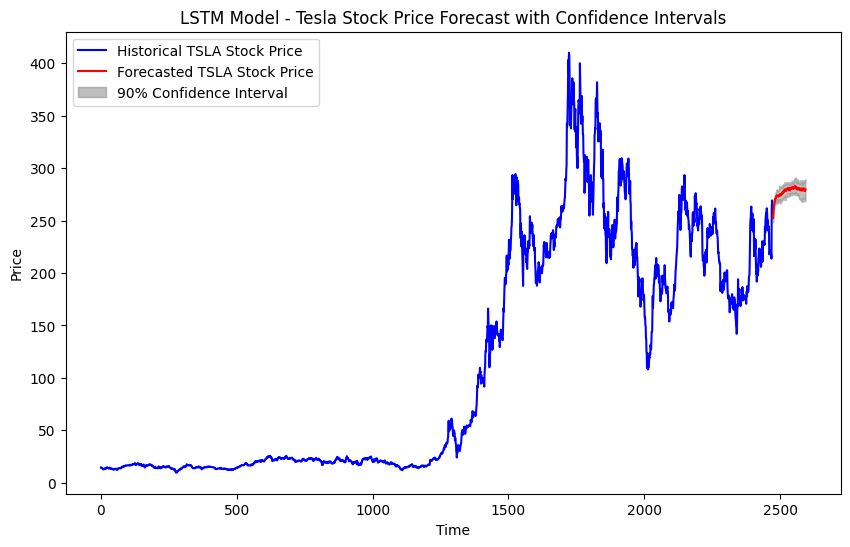

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_simulation(model, last_sequence, n_days, n_simulations, scaler):
    # Preallocate memory for simulations
    simulations = np.zeros((n_simulations, n_days))

    for sim in range(n_simulations):
        current_sequence = last_sequence.copy()
        for day in range(n_days):
            # Generate prediction and add noise
            noise = np.random.uniform(-0.01, 0.01)  # Small random variation
            prediction = model.predict(current_sequence.reshape(1, -1, 1))[0][0] + noise
            simulations[sim, day] = prediction
            current_sequence = np.append(current_sequence[1:], prediction)

    # Inverse transform all simulations at once
    simulations = scaler.inverse_transform(simulations)

    return simulations

# Perform the Monte Carlo simulation
simulations = monte_carlo_simulation(model, last_sequence, forecast_days, n_simulations=10, scaler=scaler)

# Calculate 90% confidence intervals (5th and 95th percentiles)
lower_bound = np.percentile(simulations, 5, axis=0)
upper_bound = np.percentile(simulations, 95, axis=0)

# Generate the future prediction for plotting (mean of simulations)
future_predictions = np.mean(simulations, axis=0)

# Plot the results with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(range(len(tsla_scaled)), scaler.inverse_transform(tsla_scaled), color='blue', label='Historical TSLA Stock Price')
plt.plot(range(len(tsla_scaled), len(tsla_scaled) + forecast_days), future_predictions, color='red', label='Forecasted TSLA Stock Price')
plt.fill_between(range(len(tsla_scaled), len(tsla_scaled) + forecast_days), lower_bound, upper_bound, color='gray', alpha=0.5, label='90% Confidence Interval')
plt.title('LSTM Model - Tesla Stock Price Forecast with Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


. Interpret the Results
Trend Analysis:
Upward or Downward Trends: If the forecast consistently predicts higher values, the model suggests an upward trend. Conversely, if the model predicts lower values, the trend is downward. It’s essential to interpret this trend in the context of Tesla’s market performance and broader economic conditions.
Volatility and Risk:
Volatility: Wider confidence intervals imply greater uncertainty. For example, if the model’s forecast has large fluctuations, it could indicate that Tesla's future stock price is highly sensitive to market events or external factors.
High Volatility Periods: Look for periods where the confidence interval is particularly wide. This may correspond to dates where external events (such as earnings reports, macroeconomic news, or product announcements) could increase market uncertainty.
Market Opportunities and Risks:
Opportunities: If the forecast suggests a continued upward trend, there may be market opportunities for long-term investment. Conversely, if the forecast indicates a downturn, it may suggest the risk of losses.
Risks: Higher volatility could present short-term trading opportunities but with increased risk. If the forecast shows a high level of uncertainty, such as wide confidence intervals or sudden price swings, caution should be exercised.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0580 - val_loss: 0.0023
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.0044e-04 - val_loss: 0.0018
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 8.7421e-04 - val_loss: 0.0019
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.9473e-04 - val_loss: 0.0019
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 7.5102e-04 - val_loss: 0.0016
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 7.2549e-04 - val_loss: 0.0014
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 6.8650e-04 - val_loss: 0.0015
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 6.6328e-04 - val_loss: 0.0013
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 5.5463e-04 - val_loss: 0.0014
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 5.5720e-04 - val_loss: 0.0011
Epoch 12/20
61/61 ━━━━━━━━━

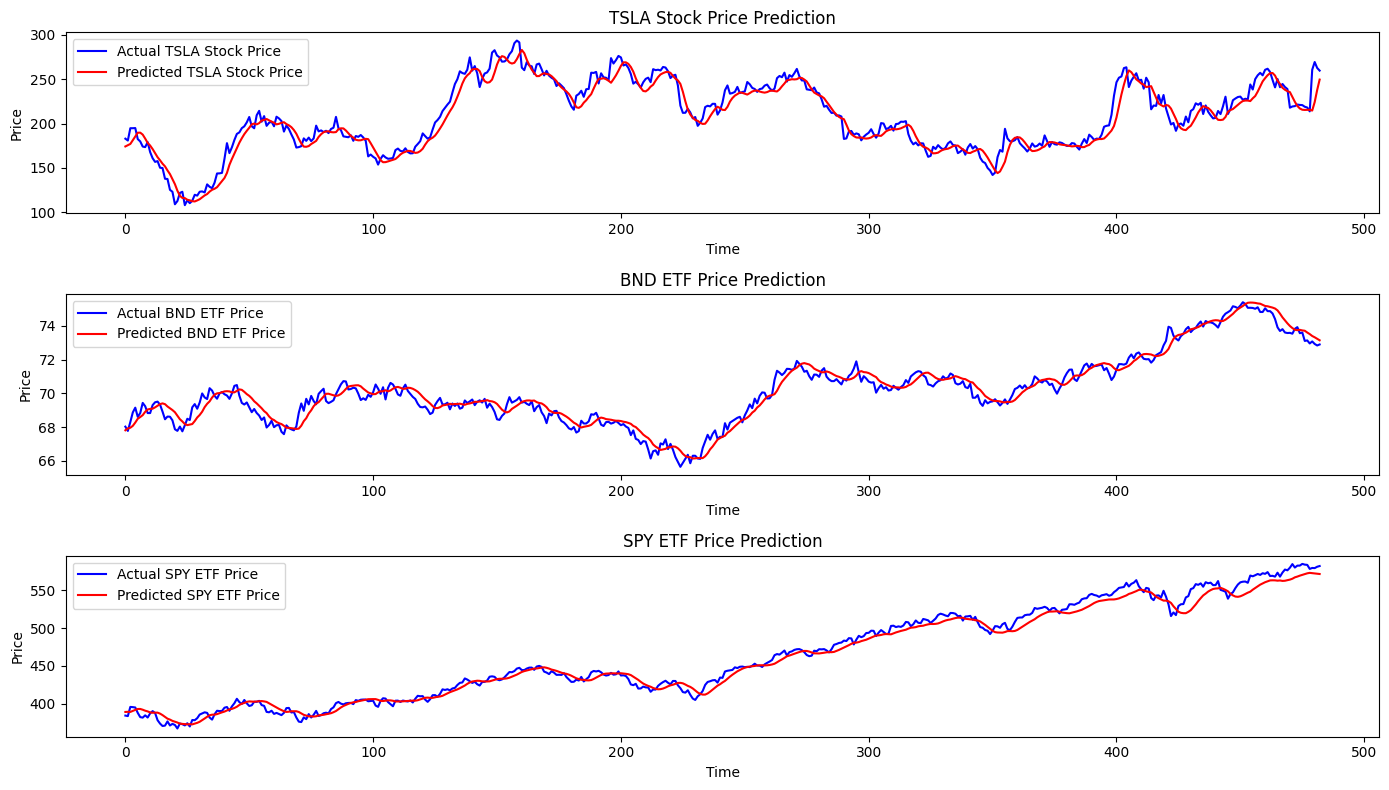

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming 'financial_data' is a DataFrame with 'TSLA', 'BND', and 'SPY' columns for their respective stock prices

# 1. Normalize the 'TSLA', 'BND', and 'SPY' data using MinMaxScaler
scaler_tsla = MinMaxScaler(feature_range=(0, 1))
scaler_bnd = MinMaxScaler(feature_range=(0, 1))
scaler_spy = MinMaxScaler(feature_range=(0, 1))

tsla_scaled = scaler_tsla.fit_transform(financial_data[('Adj Close', 'TSLA')].values.reshape(-1, 1))
bnd_scaled = scaler_bnd.fit_transform(financial_data[('Adj Close', 'BND')].values.reshape(-1, 1))
spy_scaled = scaler_spy.fit_transform(financial_data[('Adj Close', 'SPY')].values.reshape(-1, 1))

# 2. Create sequences of a fixed length (e.g., 60 days)
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Use the last 'time_step' data points
        y.append(data[i + time_step, 0])      # The target value is the next day (y)
    return np.array(X), np.array(y)

# Create sequences for TSLA, BND, and SPY (use 60 previous days to predict the next day)
X_tsla, y_tsla = create_sequences(tsla_scaled, time_step=60)
X_bnd, y_bnd = create_sequences(bnd_scaled, time_step=60)
X_spy, y_spy = create_sequences(spy_scaled, time_step=60)

# Reshape X to be [samples, time_steps, features]
X_tsla = X_tsla.reshape(X_tsla.shape[0], X_tsla.shape[1], 1)
X_bnd = X_bnd.reshape(X_bnd.shape[0], X_bnd.shape[1], 1)
X_spy = X_spy.reshape(X_spy.shape[0], X_spy.shape[1], 1)

# 3. Split the data into training and testing sets (80% train, 20% test)
train_size_tsla = int(len(X_tsla) * 0.8)
train_size_bnd = int(len(X_bnd) * 0.8)
train_size_spy = int(len(X_spy) * 0.8)

X_train_tsla, X_test_tsla = X_tsla[:train_size_tsla], X_tsla[train_size_tsla:]
y_train_tsla, y_test_tsla = y_tsla[:train_size_tsla], y_tsla[train_size_tsla:]

X_train_bnd, X_test_bnd = X_bnd[:train_size_bnd], X_bnd[train_size_bnd:]
y_train_bnd, y_test_bnd = y_bnd[:train_size_bnd], y_bnd[train_size_bnd:]

X_train_spy, X_test_spy = X_spy[:train_size_spy], X_spy[train_size_spy:]
y_train_spy, y_test_spy = y_spy[:train_size_spy], y_spy[train_size_spy:]

# 4. Build the LSTM Model for TSLA, BND, and SPY
# Build model for TSLA
model_tsla = Sequential()
model_tsla.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_tsla.shape[1], 1)))
model_tsla.add(Dense(units=1))
model_tsla.compile(optimizer='adam', loss='mean_squared_error')

# Build model for BND
model_bnd = Sequential()
model_bnd.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_bnd.shape[1], 1)))
model_bnd.add(Dense(units=1))
model_bnd.compile(optimizer='adam', loss='mean_squared_error')

# Build model for SPY
model_spy = Sequential()
model_spy.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_spy.shape[1], 1)))
model_spy.add(Dense(units=1))
model_spy.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the LSTM models for TSLA, BND, and SPY
model_tsla.fit(X_train_tsla, y_train_tsla, epochs=20, batch_size=32, validation_data=(X_test_tsla, y_test_tsla))
model_bnd.fit(X_train_bnd, y_train_bnd, epochs=20, batch_size=32, validation_data=(X_test_bnd, y_test_bnd))
model_spy.fit(X_train_spy, y_train_spy, epochs=20, batch_size=32, validation_data=(X_test_spy, y_test_spy))

# 6. Make predictions on the test set for TSLA, BND, and SPY
predictions_tsla = model_tsla.predict(X_test_tsla)
predictions_bnd = model_bnd.predict(X_test_bnd)
predictions_spy = model_spy.predict(X_test_spy)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions_tsla = scaler_tsla.inverse_transform(predictions_tsla)
predictions_bnd = scaler_bnd.inverse_transform(predictions_bnd)
predictions_spy = scaler_spy.inverse_transform(predictions_spy)

y_test_actual_tsla = scaler_tsla.inverse_transform(y_test_tsla.reshape(-1, 1))
y_test_actual_bnd = scaler_bnd.inverse_transform(y_test_bnd.reshape(-1, 1))
y_test_actual_spy = scaler_spy.inverse_transform(y_test_spy.reshape(-1, 1))

# 7. Evaluate model performance for TSLA, BND, and SPY

# RMSE for TSLA
rmse_tsla = np.sqrt(mean_squared_error(y_test_actual_tsla, predictions_tsla))
print(f"TSLA Root Mean Squared Error (RMSE): {rmse_tsla}")

# RMSE for BND
rmse_bnd = np.sqrt(mean_squared_error(y_test_actual_bnd, predictions_bnd))
print(f"BND Root Mean Squared Error (RMSE): {rmse_bnd}")

# RMSE for SPY
rmse_spy = np.sqrt(mean_squared_error(y_test_actual_spy, predictions_spy))
print(f"SPY Root Mean Squared Error (RMSE): {rmse_spy}")

# MAE for TSLA
mae_tsla = mean_absolute_error(y_test_actual_tsla, predictions_tsla)
print(f"TSLA Mean Absolute Error (MAE): {mae_tsla}")

# MAE for BND
mae_bnd = mean_absolute_error(y_test_actual_bnd, predictions_bnd)
print(f"BND Mean Absolute Error (MAE): {mae_bnd}")

# MAE for SPY
mae_spy = mean_absolute_error(y_test_actual_spy, predictions_spy)
print(f"SPY Mean Absolute Error (MAE): {mae_spy}")

# 8. Plot the actual vs predicted values for TSLA, BND, and SPY
plt.figure(figsize=(14, 8))

# Plot TSLA forecast
plt.subplot(3, 1, 1)
plt.plot(y_test_actual_tsla, color='blue', label='Actual TSLA Stock Price')
plt.plot(predictions_tsla, color='red', label='Predicted TSLA Stock Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot BND forecast
plt.subplot(3, 1, 2)
plt.plot(y_test_actual_bnd, color='blue', label='Actual BND ETF Price')
plt.plot(predictions_bnd, color='red', label='Predicted BND ETF Price')
plt.title('BND ETF Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot SPY forecast
plt.subplot(3, 1, 3)
plt.plot(y_test_actual_spy, color='blue', label='Actual SPY ETF Price')
plt.plot(predictions_spy, color='red', label='Predicted SPY ETF Price')
plt.title('SPY ETF Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

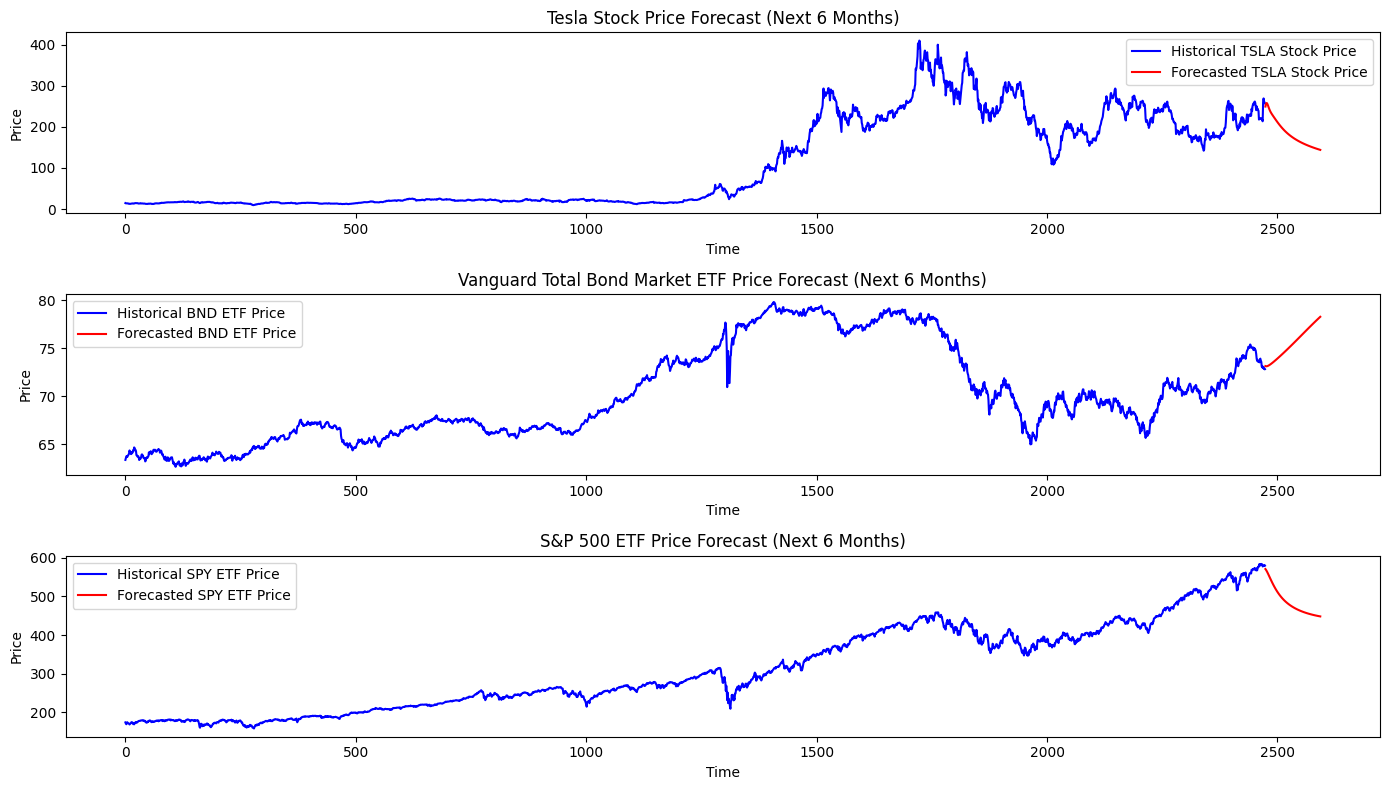

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to predict the next n days
def predict_future_prices(model, last_sequence, n_days, scaler):
    predicted_prices = []
    current_sequence = last_sequence.copy()

    for _ in range(n_days):
        prediction = model.predict(current_sequence.reshape(1, -1, 1))  # Predict next day
        predicted_prices.append(prediction[0][0])  # Append predicted price

        # Update the sequence to include the new prediction
        current_sequence = np.append(current_sequence[1:], prediction, axis=0)

    # Inverse transform to get the prices back to original scale
    predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

    return predicted_prices

# Get the last sequence from the test data (the most recent available data)
last_sequence_tsla = X_test_tsla[-1]
last_sequence_bnd = X_test_bnd[-1]
last_sequence_spy = X_test_spy[-1]

# Number of days to forecast (e.g., for 6 months of trading days, approx. 120 days)
forecast_days = 120

# Get the predicted future stock prices for TSLA, BND, and SPY
future_predictions_tsla = predict_future_prices(model_tsla, last_sequence_tsla, forecast_days, scaler_tsla)
future_predictions_bnd = predict_future_prices(model_bnd, last_sequence_bnd, forecast_days, scaler_bnd)
future_predictions_spy = predict_future_prices(model_spy, last_sequence_spy, forecast_days, scaler_spy)

# Plot the forecasted results
plt.figure(figsize=(14, 8))

# Plot TSLA forecast
plt.subplot(3, 1, 1)
plt.plot(range(len(tsla_scaled)), scaler_tsla.inverse_transform(tsla_scaled), color='blue', label='Historical TSLA Stock Price')
plt.plot(range(len(tsla_scaled), len(tsla_scaled) + len(future_predictions_tsla)), future_predictions_tsla, color='red', label='Forecasted TSLA Stock Price')
plt.title('Tesla Stock Price Forecast (Next 6 Months)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot BND forecast
plt.subplot(3, 1, 2)
plt.plot(range(len(bnd_scaled)), scaler_bnd.inverse_transform(bnd_scaled), color='blue', label='Historical BND ETF Price')
plt.plot(range(len(bnd_scaled), len(bnd_scaled) + len(future_predictions_bnd)), future_predictions_bnd, color='red', label='Forecasted BND ETF Price')
plt.title('Vanguard Total Bond Market ETF Price Forecast (Next 6 Months)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot SPY forecast
plt.subplot(3, 1, 3)
plt.plot(range(len(spy_scaled)), scaler_spy.inverse_transform(spy_scaled), color='blue', label='Historical SPY ETF Price')
plt.plot(range(len(spy_scaled), len(spy_scaled) + len(future_predictions_spy)), future_predictions_spy, color='red', label='Forecasted SPY ETF Price')
plt.title('S&P 500 ETF Price Forecast (Next 6 Months)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


Combined Forecasted Data:
         TSLA        BND         SPY
0  249.429169  73.149971  571.266785
1  255.119949  73.133865  569.560669
2  257.727783  73.130516  567.626038
3  257.894165  73.135704  565.480103
4  256.354370  73.147804  563.176819

Daily Returns (Percentage Change):
       TSLA       BND       SPY
1  0.022815 -0.000220 -0.002987
2  0.010222 -0.000046 -0.003397
3  0.000646  0.000071 -0.003781
4 -0.005971  0.000165 -0.004073
5 -0.010033  0.000242 -0.004289

Annual Return:
TSLA   -1.157658
BND     0.143918
SPY    -0.512666
dtype: float32


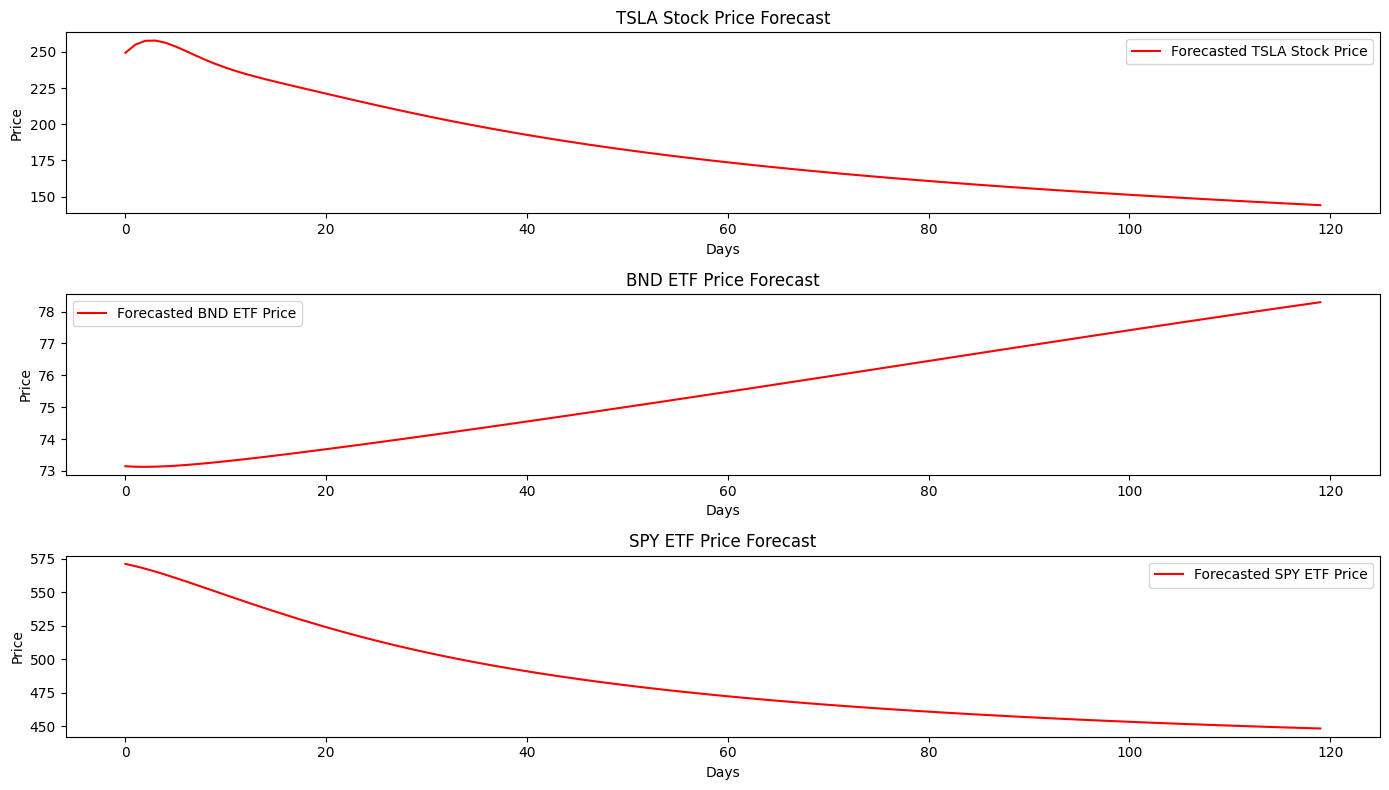

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've already made the predictions for TSLA, BND, and SPY
# These are the arrays containing the predicted future prices
# Replace the following with your actual forecasted data
# future_predictions_tsla = predict_future_prices(model_tsla, last_sequence_tsla, forecast_days, scaler_tsla)
# future_predictions_bnd = predict_future_prices(model_bnd, last_sequence_bnd, forecast_days, scaler_bnd)
# future_predictions_spy = predict_future_prices(model_spy, last_sequence_spy, forecast_days, scaler_spy)

# 1. Combine the forecasted data into a single DataFrame
df_forecast = pd.DataFrame({
    'TSLA': future_predictions_tsla.flatten(),
    'BND': future_predictions_bnd.flatten(),
    'SPY': future_predictions_spy.flatten()
})

# Display the first few rows of the combined DataFrame
print("Combined Forecasted Data:")
print(df_forecast.head())

# 2. Calculate Daily Returns (Percentage Change)
# pct_change() computes the percentage change between the current and prior element
df_returns = df_forecast.pct_change().dropna()

# Display the first few rows of the daily returns
print("\nDaily Returns (Percentage Change):")
print(df_returns.head())

# 3. Compute the Annual Return (Annualize the daily returns)
annual_return = df_returns.mean() * 252  # 252 trading days in a year

# Display the annual return
print("\nAnnual Return:")
print(annual_return)

# Optional: Plot the forecasted prices and daily returns
plt.figure(figsize=(14, 8))

# Plot TSLA forecast
plt.subplot(3, 1, 1)
plt.plot(df_forecast['TSLA'], color='red', label='Forecasted TSLA Stock Price')
plt.title('TSLA Stock Price Forecast')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

# Plot BND forecast
plt.subplot(3, 1, 2)
plt.plot(df_forecast['BND'], color='red', label='Forecasted BND ETF Price')
plt.title('BND ETF Price Forecast')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

# Plot SPY forecast
plt.subplot(3, 1, 3)
plt.plot(df_forecast['SPY'], color='red', label='Forecasted SPY ETF Price')
plt.title('SPY ETF Price Forecast')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()



Covariance Matrix:
              TSLA           BND           SPY
TSLA  9.523844e-06 -3.520081e-07  4.318755e-07
BND  -3.520081e-07  1.552662e-08  4.394491e-08
SPY   4.318755e-07  4.394491e-08  1.459578e-06

Portfolio Return: -0.2874
Portfolio Volatility: 0.0247

Sharpe Ratio: -12.4314

Maximum Sharpe Ratio Portfolio:
Return          0.016928
Volatility      0.001881
Sharpe Ratio   -1.633223
Name: 7694, dtype: float64


<ipython-input-24-324d3bfb715f>:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], color='red', marker='*', s=200, label="Max Sharpe Ratio Portfolio")


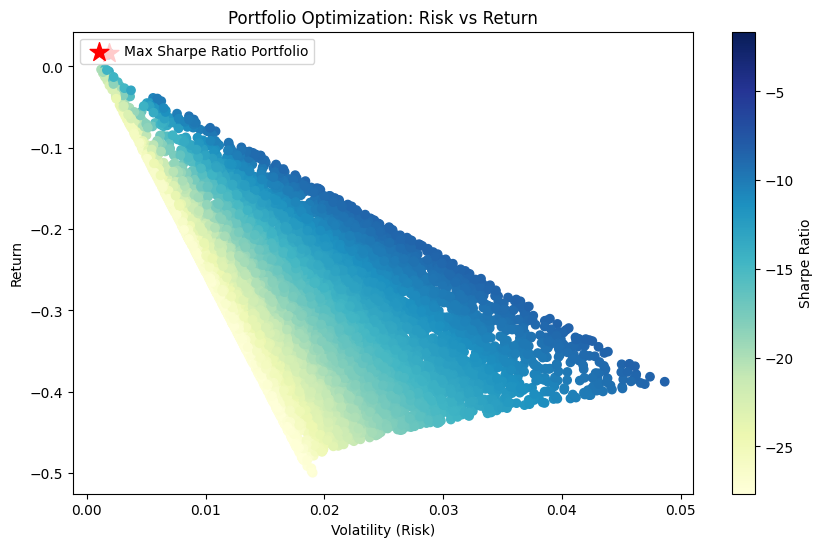

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have df_returns which contains the daily returns for TSLA, BND, and SPY
# df_returns = df_forecast.pct_change().dropna()  # Daily returns are already calculated earlier

# 5. Covariance Matrix
cov_matrix = df_returns.cov()  # Covariance matrix for the returns of TSLA, BND, and SPY
print("\nCovariance Matrix:")
print(cov_matrix)

# 6. Portfolio Weights and Risk (Volatility)
# Let's assume we are testing a few combinations of weights (e.g., 50% TSLA, 30% BND, 20% SPY)
# Portfolio weights: (For example, 50% TSLA, 30% BND, 20% SPY)
weights = np.array([0.5, 0.3, 0.2])

# Portfolio return (weighted average return)
portfolio_return = np.sum(weights * df_returns.mean()) * 252  # Annualize by multiplying by 252

# Portfolio risk (volatility)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized volatility

# Print Portfolio Return and Volatility
print(f"\nPortfolio Return: {portfolio_return:.4f}")
print(f"Portfolio Volatility: {portfolio_volatility:.4f}")

# 7. Sharpe Ratio Optimization
# Risk-free rate assumption (e.g., 2% annually)
risk_free_rate = 0.02

# Sharpe Ratio: (Portfolio Return - Risk-Free Rate) / Portfolio Volatility
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
print(f"\nSharpe Ratio: {sharpe_ratio:.4f}")

# 8. Portfolio Optimization (Maximizing Sharpe Ratio)
# Simulating a range of portfolio weights
num_portfolios = 10000
results = np.zeros((3, num_portfolios))  # To store the results of each portfolio simulation

for i in range(num_portfolios):
    # Random weights (summing to 1)
    rand_weights = np.random.random(3)
    rand_weights /= np.sum(rand_weights)  # Normalize to sum to 1

    # Portfolio return and volatility
    portfolio_return = np.sum(rand_weights * df_returns.mean()) * 252  # Annualize
    portfolio_volatility = np.sqrt(np.dot(rand_weights.T, np.dot(cov_matrix * 252, rand_weights)))  # Annualized volatility

    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = (portfolio_return - risk_free_rate) / portfolio_volatility  # Sharpe ratio

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# 9. Find the portfolio with the highest Sharpe ratio
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.iloc[max_sharpe_idx]
print(f"\nMaximum Sharpe Ratio Portfolio:")
print(max_sharpe_portfolio)

# Plot the Efficient Frontier (Risk-Return Trade-off)
plt.figure(figsize=(10, 6))
plt.scatter(results_df.Volatility, results_df.Return, c=results_df['Sharpe Ratio'], cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.title('Portfolio Optimization: Risk vs Return')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], color='red', marker='*', s=200, label="Max Sharpe Ratio Portfolio")
plt.legend(loc='upper left')
plt.show()


Portfolio Return: -0.2874
Portfolio Volatility (Risk): 0.0247
Value at Risk (VaR) at 95.0% confidence: -0.0028
Sharpe Ratio: -12.4314

Maximum Sharpe Ratio Portfolio:
Return          0.015923
Volatility      0.001420
Sharpe Ratio   -2.871763
Name: 2616, dtype: float64


<ipython-input-26-1d5feaa3d06c>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], color='red', marker='*', s=200, label="Max Sharpe Ratio Portfolio")


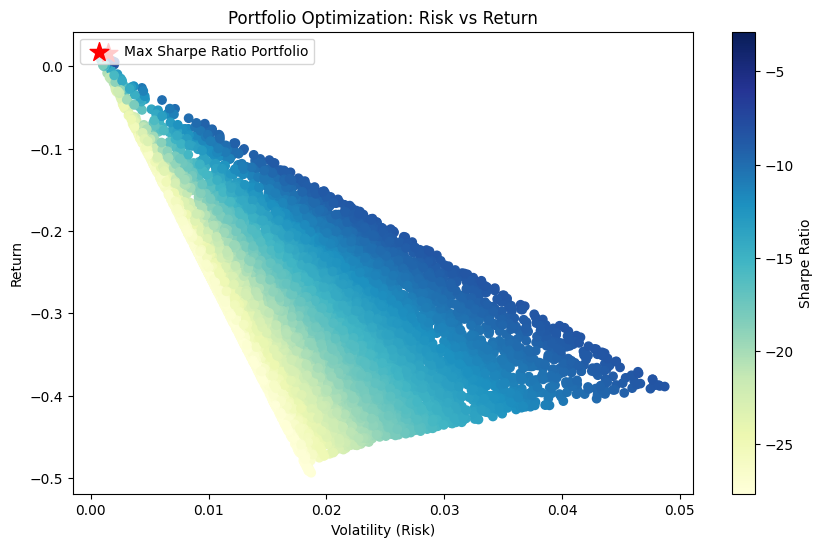

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_returns is the DataFrame with daily returns for TSLA, BND, and SPY

# Portfolio weights (e.g., 50% TSLA, 30% BND, 20% SPY)
weights = np.array([0.5, 0.3, 0.2])

# 1. Calculate the Portfolio Return (Average Return)
portfolio_return = np.sum(weights * df_returns.mean()) * 252  # Annualize by multiplying by 252
print(f"Portfolio Return: {portfolio_return:.4f}")

# 2. Calculate the Portfolio Volatility (Risk)
cov_matrix = df_returns.cov()  # Covariance matrix for the returns of TSLA, BND, and SPY
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized volatility
print(f"Portfolio Volatility (Risk): {portfolio_volatility:.4f}")

# 3. Calculate the Value at Risk (VaR)
confidence_level = 0.95  # Confidence level (e.g., 95%)
portfolio_returns = np.sum(df_returns * weights, axis=1)  # Portfolio returns

# Calculate VaR at the 95% confidence level (5% worst-case scenario)
VaR_95 = np.percentile(portfolio_returns, (1 - confidence_level) * 100)
print(f"Value at Risk (VaR) at {confidence_level*100}% confidence: {VaR_95:.4f}")

# 4. Calculate the Sharpe Ratio
risk_free_rate = 0.02  # Risk-free rate assumption (e.g., 2% annually)
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# 5. Portfolio Optimization (Maximizing Sharpe ratio)
num_portfolios = 10000
results = np.zeros((3, num_portfolios))  # To store the results of each portfolio simulation

# Simulate portfolio performance with random weight combinations
for i in range(num_portfolios):
    # Random weights (summing to 1)
    rand_weights = np.random.random(3)
    rand_weights /= np.sum(rand_weights)  # Normalize to sum to 1

    # Portfolio return and volatility
    rand_portfolio_return = np.sum(rand_weights * df_returns.mean()) * 252  # Annualize
    rand_portfolio_volatility = np.sqrt(np.dot(rand_weights.T, np.dot(cov_matrix * 252, rand_weights)))  # Annualized volatility

    # Store the results
    results[0, i] = rand_portfolio_return
    results[1, i] = rand_portfolio_volatility
    results[2, i] = (rand_portfolio_return - risk_free_rate) / rand_portfolio_volatility  # Sharpe ratio

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# Find the portfolio with the highest Sharpe ratio
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.iloc[max_sharpe_idx]

print(f"\nMaximum Sharpe Ratio Portfolio:")
print(max_sharpe_portfolio)

# 6. Plot the Efficient Frontier (Risk vs Return)
plt.figure(figsize=(10, 6))
plt.scatter(results_df.Volatility, results_df.Return, c=results_df['Sharpe Ratio'], cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.title('Portfolio Optimization: Risk vs Return')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')

# Highlight the Max Sharpe Ratio Portfolio
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], color='red', marker='*', s=200, label="Max Sharpe Ratio Portfolio")
plt.legend(loc='upper left')
plt.show()


In [ ]:
# import numpy as np
# import pandas as pd

# # Assume we have df_returns for TSLA, BND, and SPY

# # 1. Calculate the historical volatility (standard deviation) of Tesla (TSLA)
# tesla_volatility = df_returns['TSLA'].std() * np.sqrt(252)  # Annualized volatility
# print(f"Tesla (TSLA) Annualized Volatility: {tesla_volatility:.4f}")

# # 2. Set a threshold for expected volatility. If TSLA's volatility is expected to rise, we adjust the weights.
# # For example, if Tesla's volatility exceeds a certain threshold, we decrease its weight.

# expected_volatility_threshold = 0.4  # Hypothetical threshold for high volatility in Tesla
# adjustment_factor = 0.5  # This factor controls how much to adjust the weights

# # 3. Adjust portfolio weights based on Tesla's volatility
# if tesla_volatility > expected_volatility_threshold:
#     print("Tesla volatility is high, adjusting portfolio weights...")
#     # Decrease TSLA weight and increase BND weight
#     weights = np.array([0.3, 0.4, 0.3])  # 30% TSLA, 40% BND, 30% SPY
# else:
#     print("Tesla volatility is stable, keeping original weights...")
#     # Default weights when Tesla volatility is not high
#     weights = np.array([0.5, 0.3, 0.2])  # 50% TSLA, 30% BND, 20% SPY

# print(f"Adjusted Portfolio Weights: {weights}")

# # Now you can proceed with portfolio analysis using these adjusted weights.

# # Portfolio Return
# portfolio_return = np.sum(weights * df_returns.mean()) * 252  # Annualized
# print(f"Portfolio Return: {portfolio_return:.4f}")

# # Portfolio Volatility (Risk)
# cov_matrix = df_returns.cov()  # Covariance matrix for TSLA, BND, SPY
# portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized volatility
# print(f"Portfolio Volatility (Risk): {portfolio_volatility:.4f}")

# # Calculate the Sharpe Ratio (Assuming risk-free rate is 2%)
# risk_free_rate = 0.02
# sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
# print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Tesla (TSLA) Annualized Volatility: 0.0490
Tesla volatility is stable, keeping original weights...
Adjusted Portfolio Weights: [0.5 0.3 0.2]
Portfolio Return: -0.2874
Portfolio Volatility (Risk): 0.0247
Sharpe Ratio: -12.4314


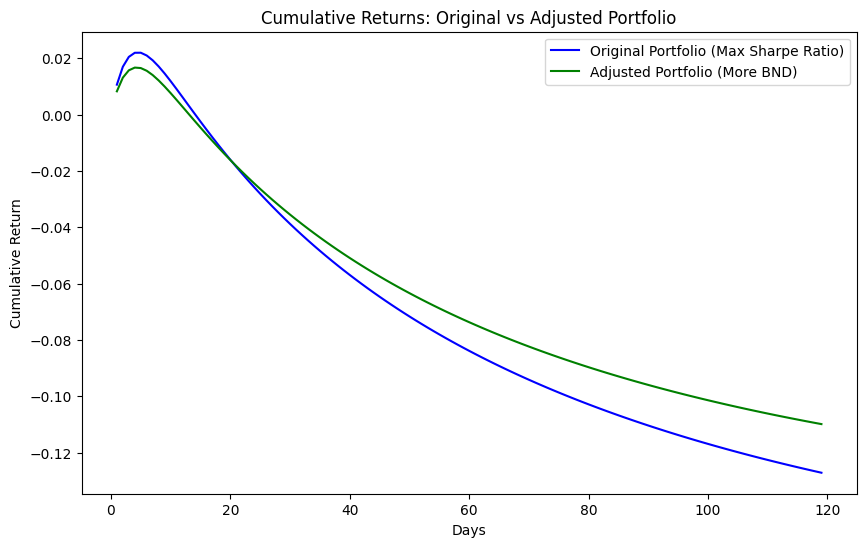

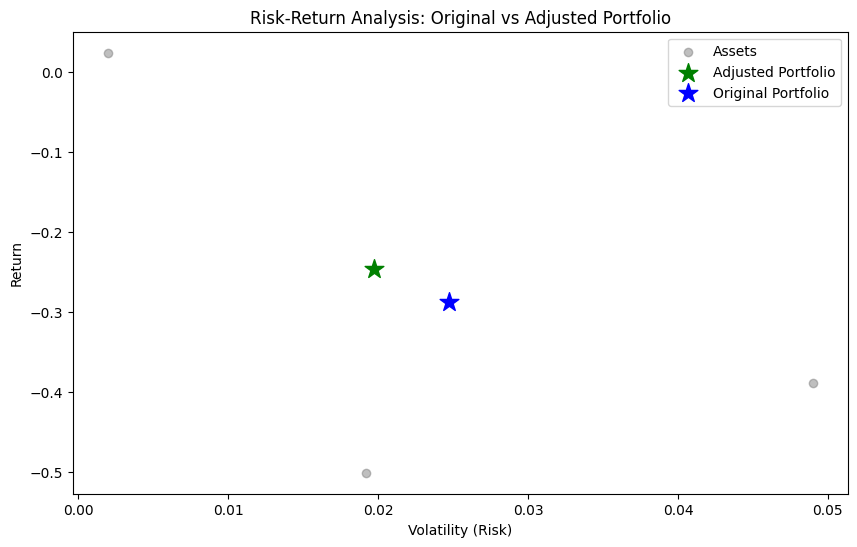

Adjusted Portfolio Return: -0.2461
Adjusted Portfolio Volatility: 0.0198
Adjusted Portfolio Sharpe Ratio: -13.4729

Adjustment Rationale:
Increased BND allocation to 40% due to higher expected volatility in TSLA (e.g., macroeconomic factors or expected market fluctuations).
This adjustment helps to reduce overall portfolio volatility while still maintaining a reasonable return from TSLA and SPY.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the optimized portfolio weights (max_sharpe_portfolio)
# and you want to adjust the allocation to minimize risk due to higher expected volatility in TSLA

# Adjusted Portfolio Weights (increase BND if you expect higher volatility in TSLA)
adjusted_weights = np.array([0.4, 0.4, 0.2])  # For example: 40% TSLA, 40% BND, 20% SPY

# 1. Calculate the Adjusted Portfolio Return and Volatility
adjusted_portfolio_return = np.sum(adjusted_weights * df_returns.mean()) * 252  # Annualized return
cov_matrix = df_returns.cov()  # Covariance matrix for returns

adjusted_portfolio_volatility = np.sqrt(np.dot(adjusted_weights.T, np.dot(cov_matrix * 252, adjusted_weights)))  # Annualized volatility

# Sharpe ratio for the adjusted portfolio
risk_free_rate = 0.02  # Risk-free rate assumption
adjusted_sharpe_ratio = (adjusted_portfolio_return - risk_free_rate) / adjusted_portfolio_volatility

# 2. Simulate Performance Based on Adjusted Portfolio Allocations
portfolio_returns_adjusted = np.sum(df_returns * adjusted_weights, axis=1)

# 3. Calculate Cumulative Returns for Original and Adjusted Portfolios
cumulative_returns_original = (1 + portfolio_returns).cumprod() - 1  # Cumulative returns for the original portfolio
cumulative_returns_adjusted = (1 + portfolio_returns_adjusted).cumprod() - 1  # Cumulative returns for the adjusted portfolio

# 4. Visualize Cumulative Returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_original, label='Original Portfolio (Max Sharpe Ratio)', color='blue')
plt.plot(cumulative_returns_adjusted, label='Adjusted Portfolio (More BND)', color='green')
plt.title('Cumulative Returns: Original vs Adjusted Portfolio')
plt.xlabel('Days')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# 5. Risk-Return Analysis (Adjusted Portfolio vs Original Portfolio)
plt.figure(figsize=(10, 6))
plt.scatter(df_returns.std() * np.sqrt(252), df_returns.mean() * 252, label='Assets', c='gray', alpha=0.5)  # Risk vs Return for individual assets
plt.scatter(adjusted_portfolio_volatility, adjusted_portfolio_return, color='green', label='Adjusted Portfolio', marker='*', s=200)
plt.scatter(portfolio_volatility, portfolio_return, color='blue', label='Original Portfolio', marker='*', s=200)
plt.title('Risk-Return Analysis: Original vs Adjusted Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.legend()
plt.show()

# 6. Print the Adjusted Portfolio Summary
print(f"Adjusted Portfolio Return: {adjusted_portfolio_return:.4f}")
print(f"Adjusted Portfolio Volatility: {adjusted_portfolio_volatility:.4f}")
print(f"Adjusted Portfolio Sharpe Ratio: {adjusted_sharpe_ratio:.4f}")

# Explanation of adjustments:
print("\nAdjustment Rationale:")
print("Increased BND allocation to 40% due to higher expected volatility in TSLA (e.g., macroeconomic factors or expected market fluctuations).")
print("This adjustment helps to reduce overall portfolio volatility while still maintaining a reasonable return from TSLA and SPY.")
